# PCA

PCA generates a set of principal components, an orthonormal basis that spans the space. These principal components have e-values (hence s-values) associated with them. Larger e-values means that corresponding component is responsible for the variation in the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
print sklearn.__version__
from sklearn.decomposition import TruncatedSVD, PCA

0.20.2


### Generate Training Data

In [3]:
data = np.zeros((20, 3), dtype=np.int)

In [4]:
def f(x):
    return (3*x)+2

def f_noise_pos(x):
    return f(x) + np.random.normal(10, 3)

def f_noise_neg(x):
    return f(x) + np.random.normal(-15, 4)

In [5]:
posx = np.arange(10)
posy = map(f_noise_pos, posx)
negx = posx + 0.5
negy = map(f_noise_neg, negx)

Combine training data into a single array

In [6]:
allx = np.concatenate((posx, negx))
ally = np.concatenate((posy, negy))
allz = np.concatenate((np.ones(len(posx)), -1 * np.ones(len(negx))))
alldata = np.vstack((allx, ally, allz)).T
print alldata.shape
alldata[15,:]

(20, 3)


array([ 5.5       ,  5.13253151, -1.        ])

### Generate Testing Data

In [7]:
testx_pos = posx + np.random.normal(2, 15)
testy_pos = map(f_noise_pos, testx_pos)
testx_neg = negx + np.random.normal(-2, 15)
testy_neg = map(f_noise_neg, testx_neg)

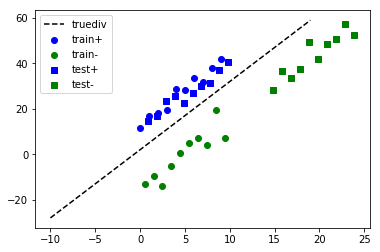

In [8]:
plt.scatter(posx, posy, marker='o', c='b', label='train+')
plt.scatter(negx, negy, marker='o', c='g', label='train-')

plt.scatter(testx_pos, testy_pos, c='b', marker='s', label='test+')
plt.scatter(testx_neg, testy_neg, c='g', marker='s', label='test-')

plt.plot(np.arange(-10, 20), map(f, np.arange(-10, 20)), c='k', linestyle='--', label='truediv')
plt.legend()

Combine test data into a single array

In [9]:
alltestx = np.concatenate((testx_pos, testx_neg))
alltesty = np.concatenate((testy_pos, testy_neg))
alltestz = np.concatenate((np.ones(len(testx_pos)), -1 * np.ones(len(testx_neg))))
alltestdata = np.vstack((alltestx, alltesty, alltestz)).T
print alltestdata.shape
alltestdata

(20, 3)


array([[ 0.84931883, 14.5496542 ,  1.        ],
       [ 1.84931883, 16.70649536,  1.        ],
       [ 2.84931883, 23.36089898,  1.        ],
       [ 3.84931883, 25.72817864,  1.        ],
       [ 4.84931883, 22.72015772,  1.        ],
       [ 5.84931883, 27.14838606,  1.        ],
       [ 6.84931883, 30.11412685,  1.        ],
       [ 7.84931883, 31.17659133,  1.        ],
       [ 8.84931883, 36.92179668,  1.        ],
       [ 9.84931883, 40.46641193,  1.        ],
       [14.85277817, 28.23524649, -1.        ],
       [15.85277817, 36.48302106, -1.        ],
       [16.85277817, 33.75440102, -1.        ],
       [17.85277817, 37.35795893, -1.        ],
       [18.85277817, 49.21921263, -1.        ],
       [19.85277817, 41.78370295, -1.        ],
       [20.85277817, 48.7127233 , -1.        ],
       [21.85277817, 50.72359304, -1.        ],
       [22.85277817, 57.50369757, -1.        ],
       [23.85277817, 52.50305652, -1.        ]])

### PCA on test data

In [10]:
pca = PCA()
pca.fit(alldata[:, :2])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.97750202, 0.02249798])

In [12]:
pca.mean_

array([ 4.75      , 13.48083749])

In [13]:
pca.singular_values_

array([74.20395472, 11.25744979])

In [14]:
pca.n_features_

2

In [15]:
pca.n_samples_

20

In [16]:
pca.components_

array([[ 0.08571102,  0.99632004],
       [ 0.99632004, -0.08571102]])

Plot the principal components on the graph

In [17]:
pca.components_[:, 0], pca.components_[:,1]

(array([0.08571102, 0.99632004]), array([ 0.99632004, -0.08571102]))

In [18]:
pca.components_[0, :], pca.components_[1,:]

(array([0.08571102, 0.99632004]), array([ 0.99632004, -0.08571102]))

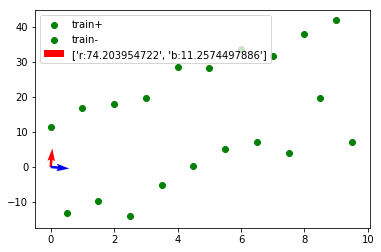

In [19]:
plt.scatter(posx, posy, marker='o', c='g', label='train+')
plt.scatter(negx, negy, marker='o', c='g', label='train-')

plt.quiver([0], [0], pca.components_[:, 0], pca.components_[:,1], color=['r', 'b'], label=['r:{}'.format(pca.singular_values_[0]), 'b:{}'.format(pca.singular_values_[1])])
plt.legend()

### Image Compression using PCA

(476, 640)


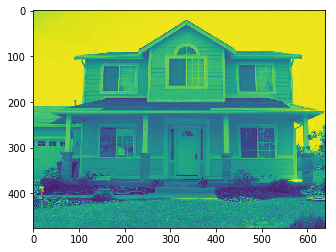

In [20]:
img = plt.imread('House1.jpg')
plt.imshow(img)
print img.shape

In [21]:
u, s, vh = np.linalg.svd(img, full_matrices=False)

In [22]:
u.shape, s.shape, vh.shape, u, s, vh

((476, 476),
 (476,),
 (476, 640),
 array([[-6.88564190e-02,  5.54788763e-02,  3.36762665e-02, ...,
          1.05218671e-01,  5.80200041e-02,  1.44143558e-03],
        [-6.78966575e-02,  5.77626628e-02,  3.83887860e-02, ...,
         -1.55570454e-01, -1.13114965e-01,  2.01795955e-02],
        [-6.75769722e-02,  5.73267241e-02,  3.79770827e-02, ...,
          2.80477086e-01,  1.32421739e-01,  9.33536147e-03],
        ...,
        [-3.40816381e-02,  5.88740437e-02, -7.16202880e-03, ...,
         -3.73963100e-03,  5.43317116e-05, -1.60179424e-04],
        [-3.39151253e-02,  5.91034888e-02,  7.48347479e-04, ...,
          3.21340839e-03,  8.24617911e-05,  2.34349603e-04],
        [-3.85866213e-02,  5.77566237e-02,  6.40485578e-03, ...,
         -6.46419368e-04, -1.52506739e-04, -3.64998258e-04]]),
 array([9.04881599e+04, 1.19496582e+04, 7.31113732e+03, 6.22119532e+03,
        4.65060454e+03, 4.09389063e+03, 3.68550752e+03, 3.31460318e+03,
        3.07331198e+03, 2.88500053e+03, 2.53112621

Reconstructing the img from SVD

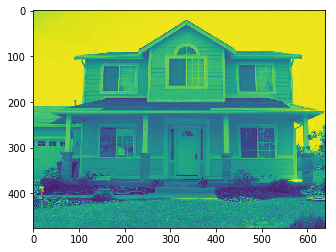

In [23]:
plt.imshow(np.matmul(u, np.matmul(np.diag(s), vh)))

Text(0.5,1,'Top 20 Singular Values')

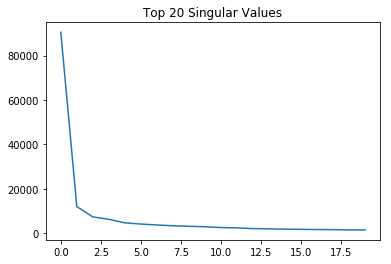

In [24]:
n_singular_values = 20
plt.plot(s[:20])
plt.title('Top {} Singular Values'.format(n_singular_values))

In [25]:
def getcompressedimg(rows):
    return np.dot(u[:, :rows], np.dot(np.diag(s[:rows]), vh[:rows, :]))

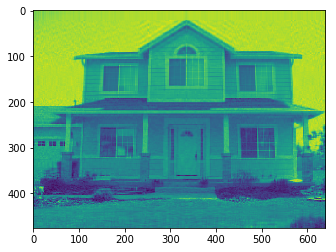

In [26]:
plt.imshow(getcompressedimg(50))

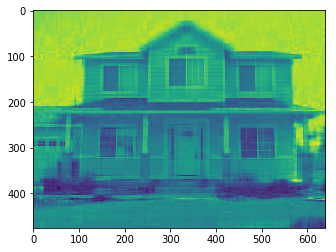

In [27]:
plt.imshow(getcompressedimg(20))

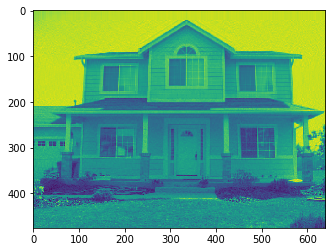

In [28]:
plt.imshow(getcompressedimg(100))

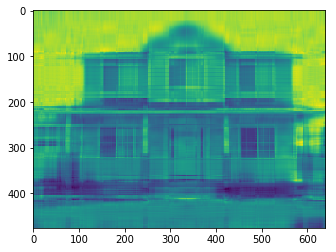

In [29]:
plt.imshow(getcompressedimg(10))

### Video Compression using PCA

In [30]:
import skvideo.io

In [31]:
video = skvideo.io.vread('/Users/jains/OneDrive/Documents/fall17/cap5415/IMG_3568.MP4', num_frames=300)
video.shape

In [40]:
gvideo = rgb2gray(video)
gvideo.shape

(300, 480, 848)

In [66]:
frame_resolution = gvideo.shape[1], gvideo.shape[2]

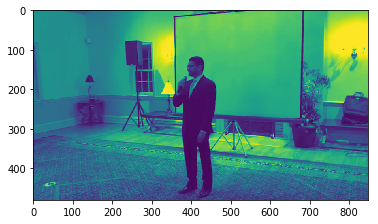

In [60]:
plt.imshow(gvideo[0,...])

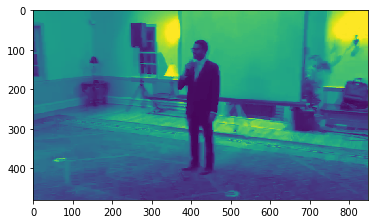

In [61]:
plt.imshow(gvideo[50,...])

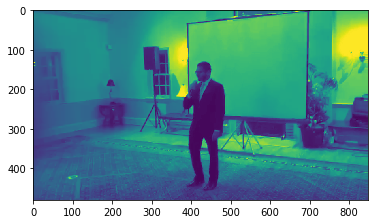

In [62]:
plt.imshow(gvideo[100,...])

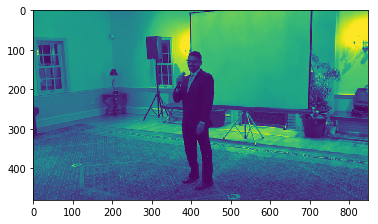

In [63]:
plt.imshow(gvideo[150,...])

Flatten video for SVD

In [52]:
gvideof = gvideo.reshape((gvideo.shape[0], -1))

In [70]:
u,s,v = np.linalg.svd(gvideof, full_matrices=False)
u.shape, s.shape, v.shape

((300, 300), (300,), (300, 407040))

In [64]:
reconstructed_gvideof = np.matmul(u, np.matmul(np.diag(s), v))
assert np.all(np.isclose(reconstructed_gvideof, gvideof))
print 'successfully reconstructed video'

successfully reconstructed video


Visually inspect reconstruction

In [77]:
def unflattenvid(vid):
    return vid.reshape((300, frame_resolution[0], frame_resolution[1]))

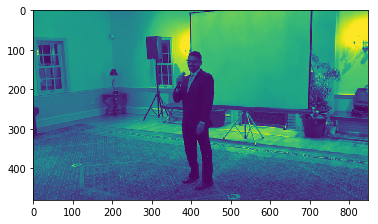

In [78]:
plt.imshow(unflattenvid(reconstructed_gvideof)[150])

Compress the video with `frames` principal components.

In [71]:
def getcompressedvideo(frames):
    return np.matmul(u[..., :frames], np.matmul(np.diag(s[:frames]), v[:frames, ...]))

Text(0.5,1,'10 PCs')

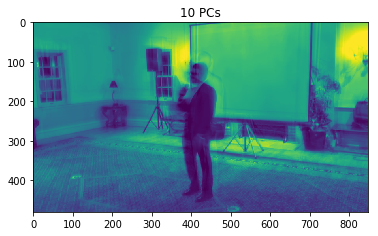

In [88]:
v10 = unflattenvid(getcompressedvideo(10))
skvideo.io.vwrite('v10.mp4', v10)
plt.imshow(v10[150])
plt.title('{} PCs'.format(10))

Text(0.5,1,'30 PCs')

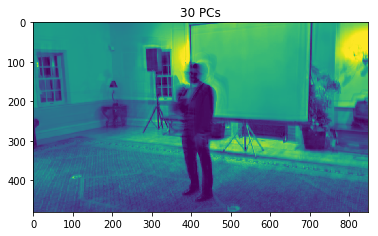

In [89]:
v30 = unflattenvid(getcompressedvideo(30))
skvideo.io.vwrite('v30.mp4', v30)
plt.imshow(v30[150])
plt.title('{} PCs'.format(30))

Text(0.5,1,'60 PCs')

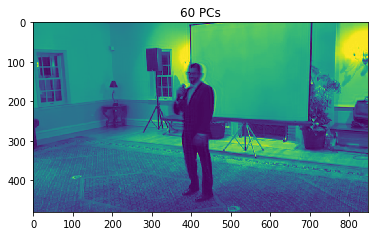

In [92]:
v60 = unflattenvid(getcompressedvideo(60))
skvideo.io.vwrite('v60.mp4', v60)
plt.imshow(v60[150])
plt.title('{} PCs'.format(60))

Text(0.5,1,'100 PCs')

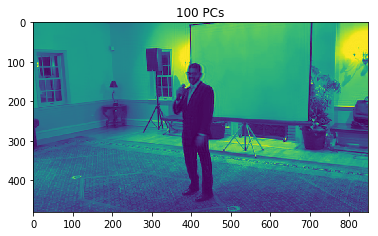

In [91]:
v100 = unflattenvid(getcompressedvideo(100))
skvideo.io.vwrite('v100.mp4', v100)
plt.imshow(v100[150])
plt.title('{} PCs'.format(100))

### Video foreground subtraction using PCA

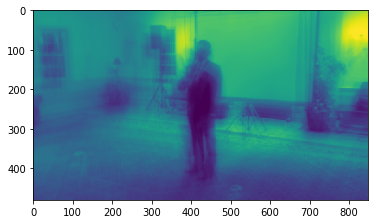

In [95]:
plt.imshow(unflattenvid(getcompressedvideo(1))[150])

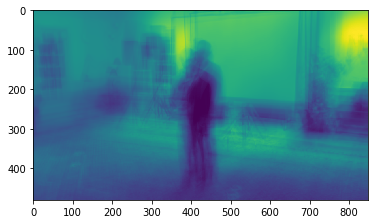

In [96]:
plt.imshow(unflattenvid(getcompressedvideo(2))[150])

Note -- this doesn't work well here because the background moves (because of camera shake) in addition to the foreground (person moves).

### Helpers

In [38]:
# https://gist.github.com/brikeats/b454ff20f3e4d060198f
def vidshow(frames, start_frame=0, end_frame=-1, fps=10, **kwargs):
    # similar to imshow, but for arrays with a time dimension
    if not isinstance(frames, np.ndarray):
        raise TypeError('vidshow requires a 3D or 4D numpy array')
    if len(frames.shape) == 3:
        is_color = False
    elif len(frames.shape) == 4:
        is_color = True
        if frames.shape[3] != 3:
            raise IndexError('vidshow only knows how to display 3-channel frames')
    else:
        raise IndexError('vidshow requires a 3D or 4D numpy array')
    
    frames = frames[start_frame:end_frame]
    
    plt.gray()
    im = plt.imshow(frames[0], **kwargs)
    for frame_num, frame in enumerate(frames):
        im.set_data(frame)        
        plt.pause(1./fps)
    plt.show()
    

In [39]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])